**1. Importing the librairies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**2. Data collection and Processing**

In [2]:
# load the dataset
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
data.shape

(6607, 20)

In [5]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
print('Data Info:')
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-

In [7]:
# check the number of missing values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [8]:
# Handle missing values

In [9]:
data["Teacher_Quality"].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [10]:
data["Parental_Education_Level"].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [11]:
data["Distance_from_Home"].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [12]:
data["Parental_Education_Level"].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [13]:
# replace missing values by the mode in the three colums: Teacher_Quality, Parental_Education_Level, Distance_from_Home
data["Teacher_Quality"] = data["Teacher_Quality"].fillna(data["Teacher_Quality"].mode()[0])
data["Parental_Education_Level"] = data["Parental_Education_Level"].fillna(data["Parental_Education_Level"].mode()[0])
data["Distance_from_Home"] = data["Distance_from_Home"].fillna(data["Distance_from_Home"].mode()[0])

In [14]:
# check if all missing values have been replaced
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


**Build a model to predict students' exam scores based on their study hours**

In [15]:
# create a dataframe with the concerned columns
df = data[['Hours_Studied', 'Exam_Score']]
X = df['Hours_Studied']
y = df['Exam_Score']

In [16]:
print(X)

0       23
1       19
2       24
3       29
4       19
        ..
6602    25
6603    23
6604    20
6605    10
6606    15
Name: Hours_Studied, Length: 6607, dtype: int64


In [17]:
print(y)

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64


In [18]:
# Split in training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the model**

In [19]:
# train the model
model = LogisticRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# evaluate the model
y_pred = model.predict(X_test.values.reshape(-1, 1))
r_squared = model.score(X_test.values.reshape(-1, 1), y_test)
mae = np.mean(np.abs(y_pred - y_test))
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)

print('R-squared:', r_squared)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


R-squared: 0.12178517397881997
Mean Absolute Error (MAE): 2.5090771558245084
Mean Squared Error (MSE): 11.618003025718608
Root Mean Squared Error (RMSE): 3.40851918370993


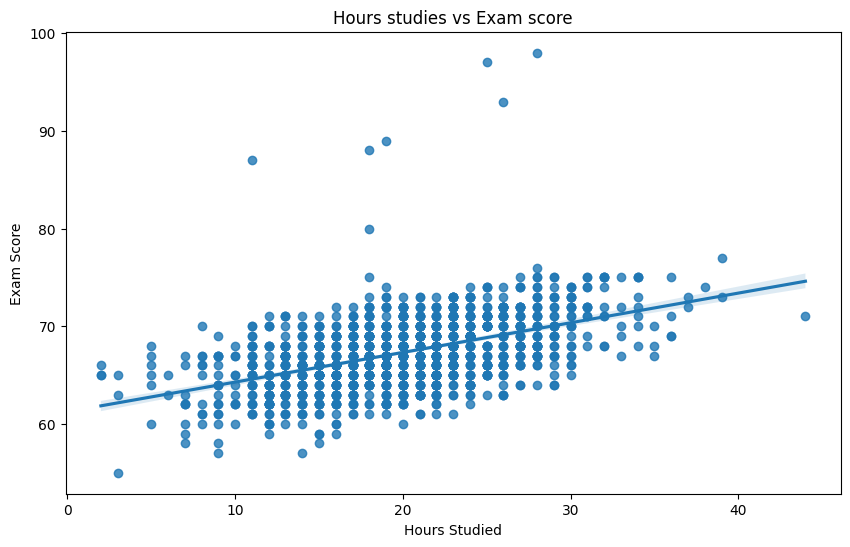

In [21]:
# add a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test, y=y_test)
plt.title('Hours studies vs Exam score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

**Other visualisations**

In [22]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [23]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


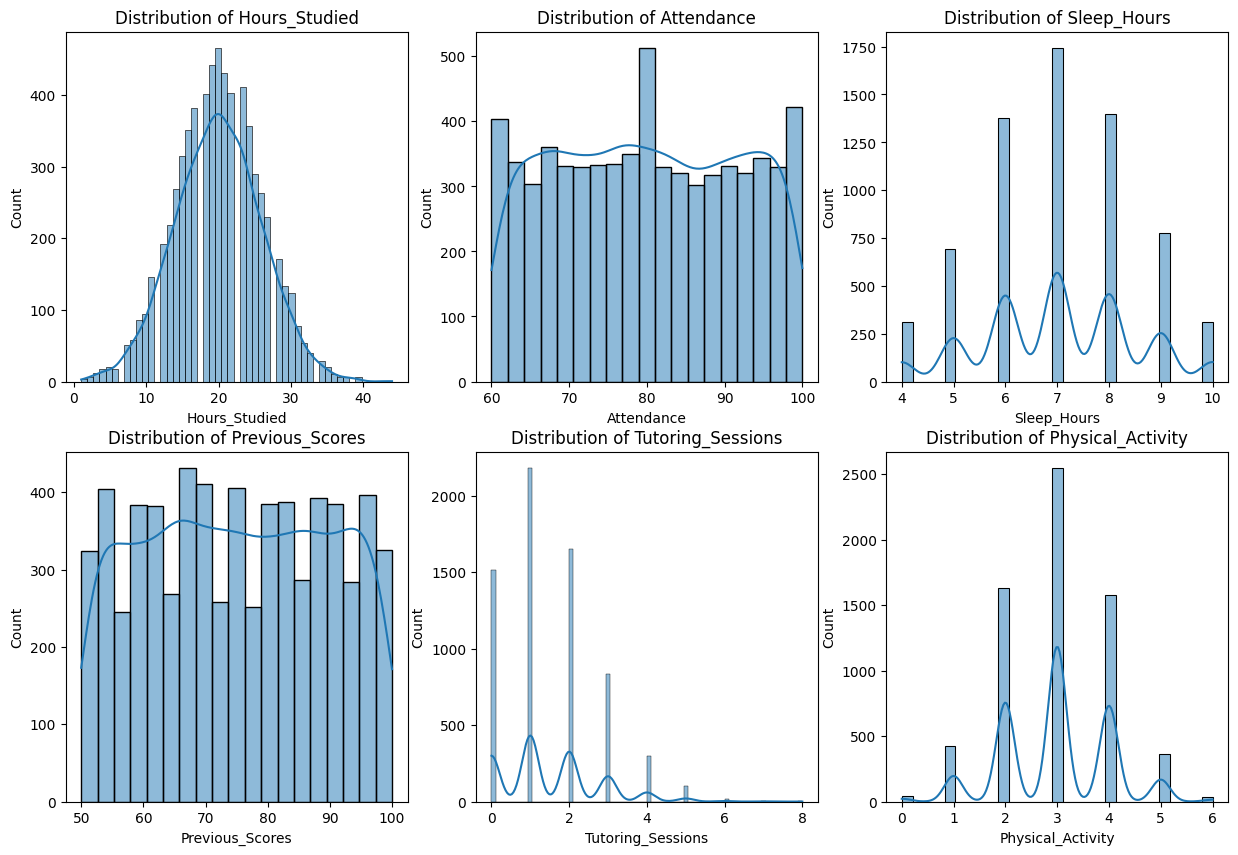

In [27]:
# distribution graphs per column (for quantitative variables)
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout
plt.show()

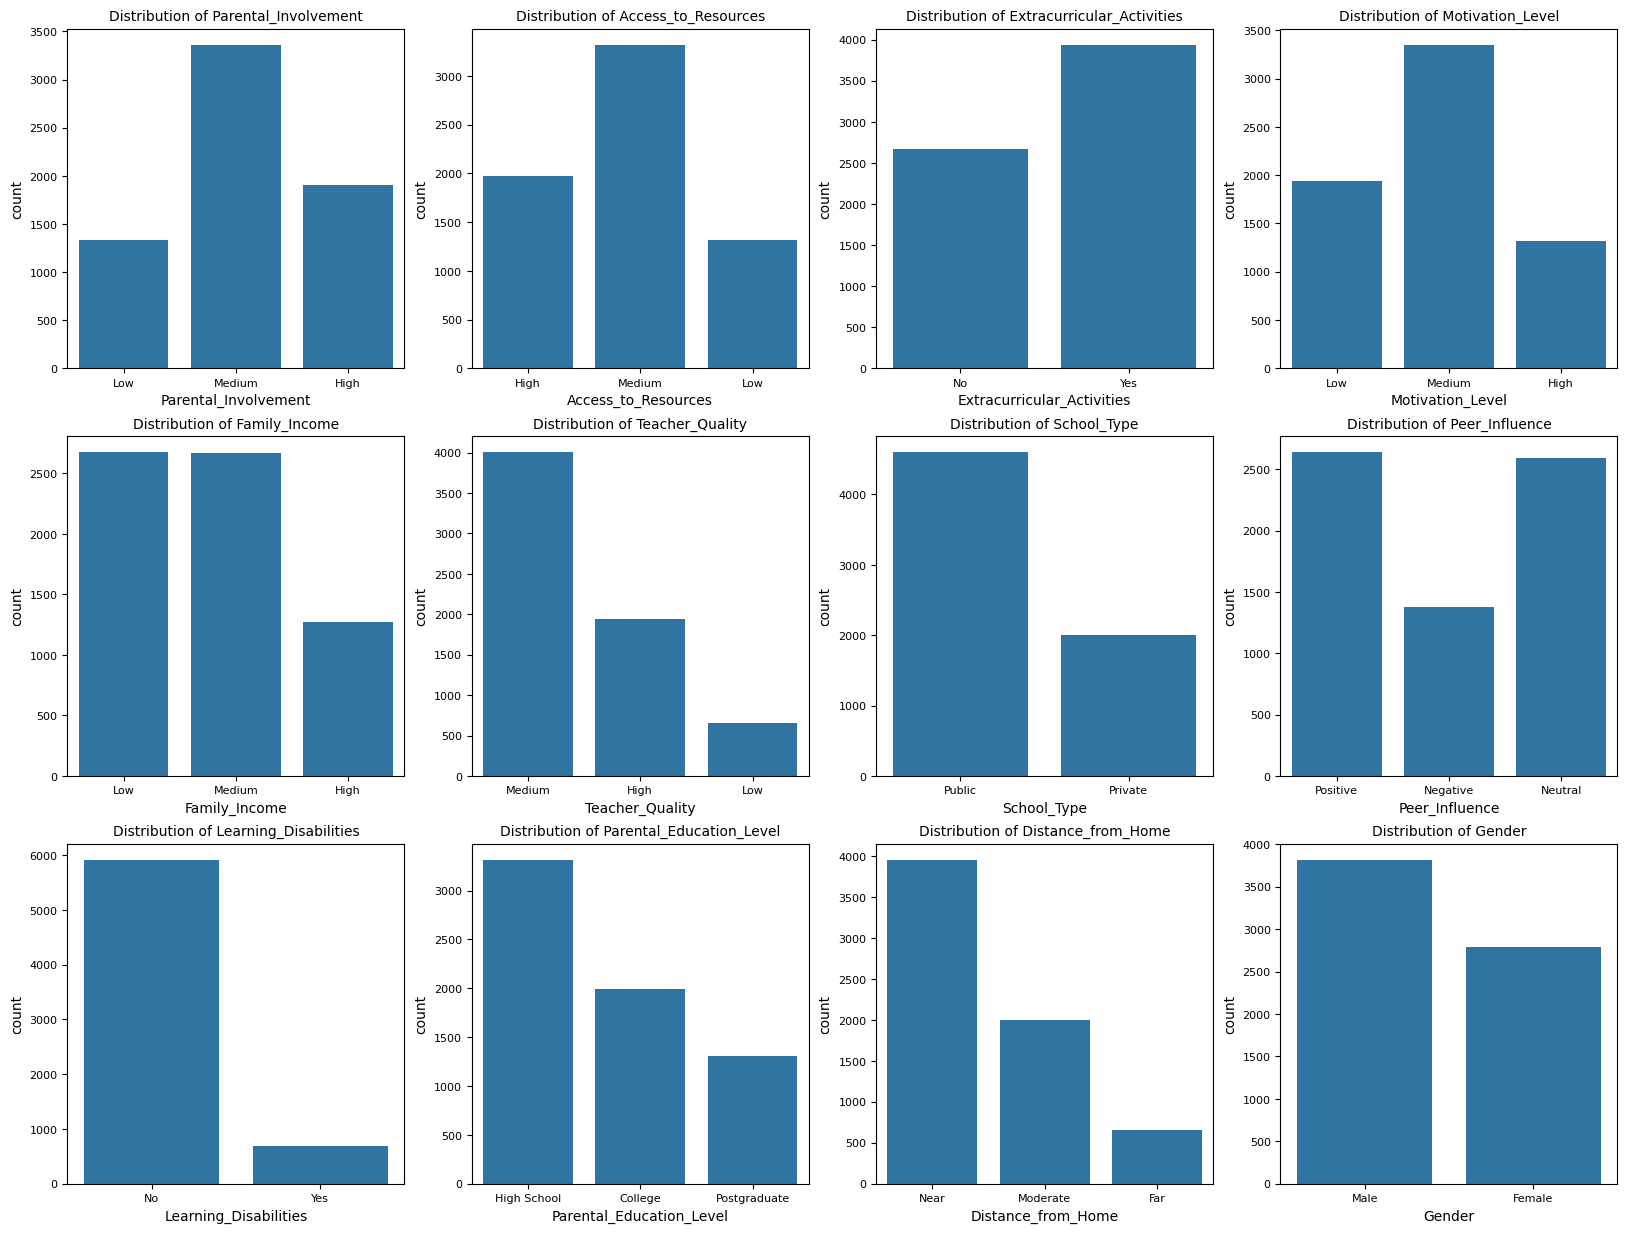

In [28]:
# check the distribution of qualitative columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Family_Income','Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities','Parental_Education_Level', 'Distance_from_Home', 'Gender'], 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=data, x=column)
    plt.title(f"Distribution of {column}", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout
plt.show()

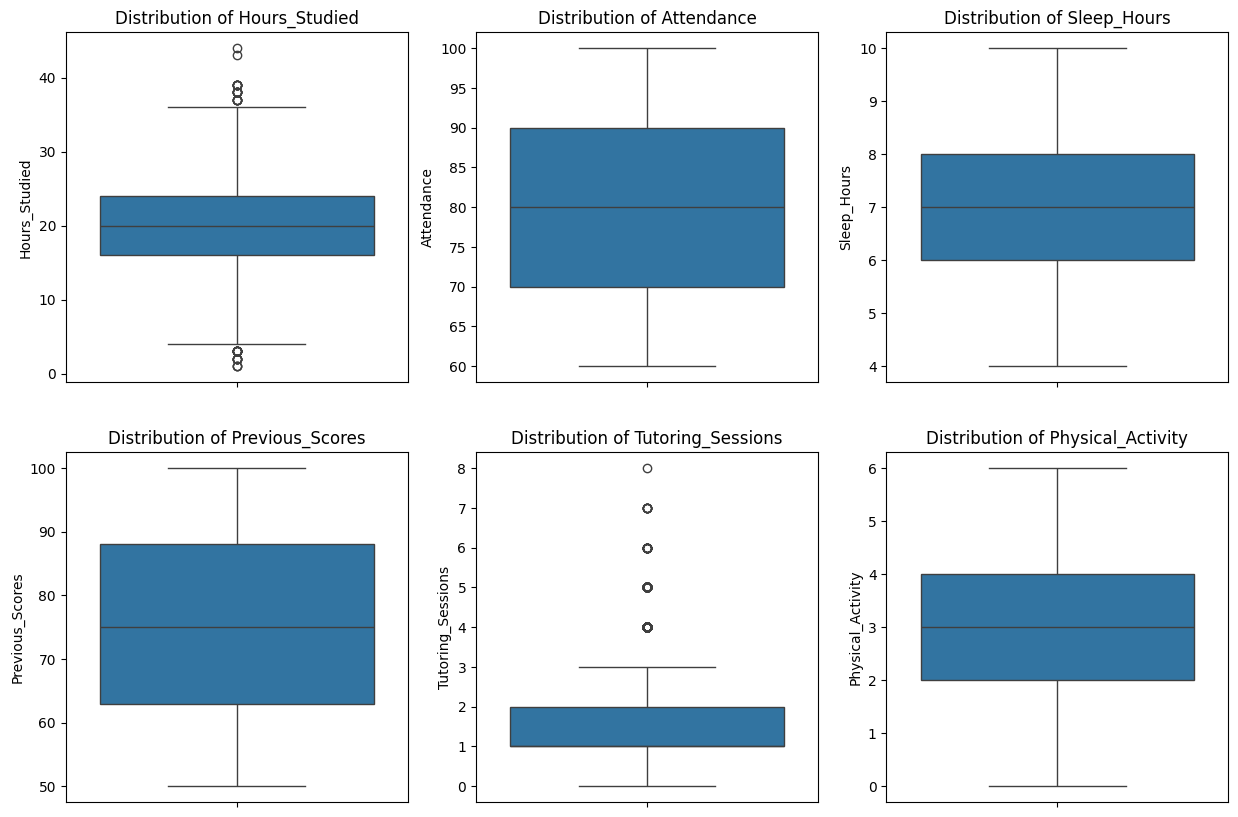

In [30]:
# boxplot graphs per column (for quantitative variables)
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout
plt.show()

**Split the dataset into training and testing sets**

In [31]:
# prepare the data for splitting

# categorical data
ordinal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Family_Income', 'Teacher_Quality','Motivation_Level']
nominal_cols = ['Gender', 'School_Type', 'Internet_Access', 'Extracurricular_Activities', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home']

In [32]:
# print unique values for all ordinal columns
for col in ordinal_cols:
    print(col, data[col].unique())

Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Family_Income ['Low' 'Medium' 'High']
Teacher_Quality ['Medium' 'High' 'Low']
Motivation_Level ['Low' 'Medium' 'High']


In [33]:
# print unique values for all nominal columns
for col in nominal_cols:
  print(col, data[col].unique())

Gender ['Male' 'Female']
School_Type ['Public' 'Private']
Internet_Access ['Yes' 'No']
Extracurricular_Activities ['No' 'Yes']
Peer_Influence ['Positive' 'Negative' 'Neutral']
Learning_Disabilities ['No' 'Yes']
Parental_Education_Level ['High School' 'College' 'Postgraduate']
Distance_from_Home ['Near' 'Moderate' 'Far']


In [34]:
# transform all ordinal column values to numbers
data['Parental_Involvement'] = data['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Access_to_Resources'] = data['Access_to_Resources'].map({'Low':1, 'Medium':2, 'High':3})
data['Motivation_Level'] = data['Motivation_Level'].map({'Low':1, 'Medium':2, 'High':3})
data['Family_Income'] = data['Family_Income'].map({'Low':1, 'Medium':2, 'High':3})
data['Teacher_Quality'] = data['Teacher_Quality'].map({'Low':1, 'Medium':2, 'High':3})

In [35]:
# transform all nominal column values to numbers
data['Gender'] = data['Gender'].map({'Male':1, 'Female':2})
data['School_Type'] = data['School_Type'].map({'Public':1, 'Private':2})
data['Internet_Access'] = data['Internet_Access'].map({'No':1, 'Yes':2})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'No':1, 'Yes':2})
data['Peer_Influence'] = data['Peer_Influence'].map({'Positive':3, 'Neutral':2, 'Negative':1})
data['Learning_Disabilities'] = data['Learning_Disabilities'].map({'No':2, 'Yes':1})
data['Parental_Education_Level'] = data['Parental_Education_Level'].map({'High School':1, 'College':2, 'Postgraduate':3})
data['Distance_from_Home'] = data['Distance_from_Home'].map({'Close':2, 'Far':1})

In [36]:
# print data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6607 non-null   int64  
 12  School_Type                 6607 non-null   int64  
 13  Peer_Influence              6607 

In [37]:
# drop Distance_from_Home column which has NAN
data = data.drop(columns=['Distance_from_Home'])

In [39]:
# split features and target as X and y
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

In [40]:
print(X)

      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    3   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     3                    2   
6603             23          76                     3                    2   
6604             20          90                     2                    1   
6605             10          86                     3                    3   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

In [41]:
print(y)

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64


In [42]:
# splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train a linear regression model to estimate final scores**

In [43]:
# train a linear regression model
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Visualize predictions and evaluate model performance**

In [44]:
# predict and evaluate
y_pred = linear_model.predict(X_test)

mae = np.mean(np.abs(y_pred - y_test))
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)
r_squared = linear_model.score(X_test, y_test)

In [45]:
print("\n Test Metrics")
print(f"MAE : {mae:,.4f}")
print(f"MSE : {mse:,.4f}")
print(f"RMSE: {rmse:,.4f}")
print(f"r_squared  : {r_squared:,.4f}")


 Test Metrics
MAE : 2.3411
MSE : 11.1051
RMSE: 3.3324
r_squared  : 0.1528


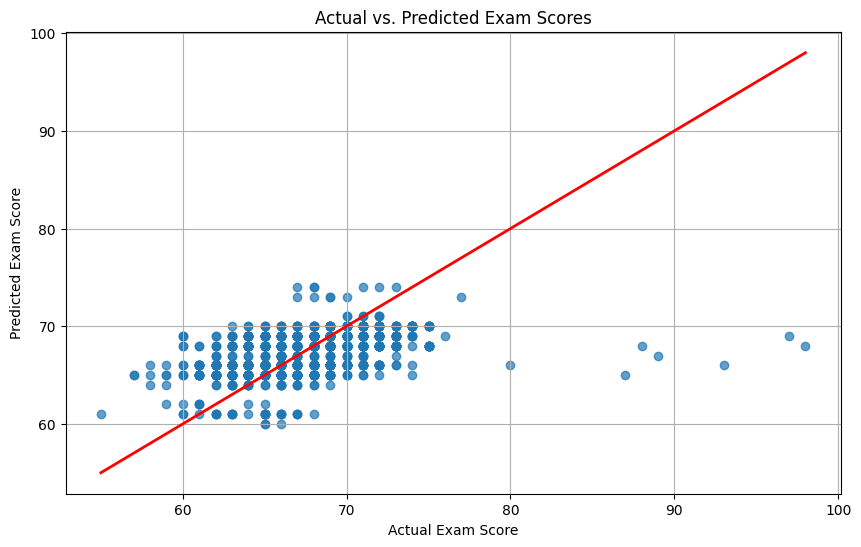

In [47]:
from numpy._core.defchararray import lower
# create plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
low, high = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([low, high], [low, high], linewidth=2, color='red')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.grid(True)
plt.show()

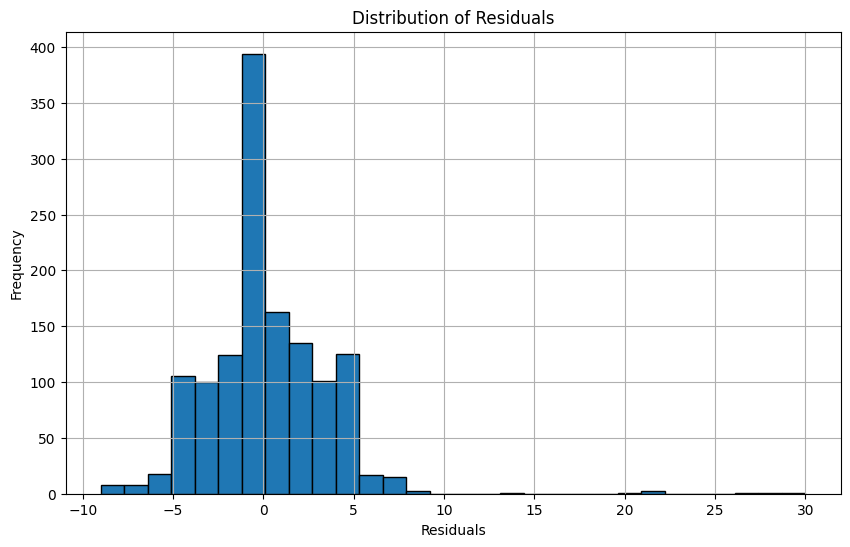

In [48]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Distribution of Residuals')
plt.show()

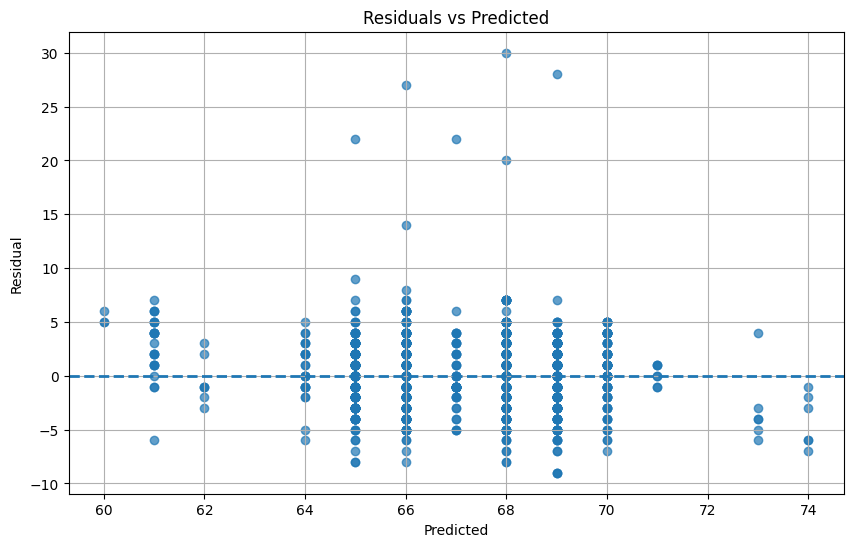

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, linestyle="--", linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()